In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
%matplotlib inline

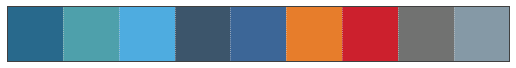

In [2]:
sns.set_style('whitegrid', {'grid.linestyle': ':', 'axes.edgecolor': '.25'})
sns.set_palette(['#28698C', '#4EA0AB', '#4EACE0', '#3C556B', '#3C6697', '#E77D2B', '#CC202D', '#717271', '#8599A6'])
sns.palplot(sns.color_palette())
plt.rc('font', family='Arial', size='11')
cl=sns.color_palette()

## Stacked Bar Graph: Changes in Just Eat's Cost Structure

In [3]:
je=pd.read_csv('je_plc.csv', index_col=0).transpose()
je['Total']=je[je>0].sum(axis=1)
je

,Cost of sales,Staff,Marketing,Depreciation and amortisation,Other expenses,Operating EBITA,Total
2011,9.467456,52.958580,23.076923,4.470309,12.130178,-2.103445,102.103445
2012,8.469132,44.169316,25.598126,4.954808,17.901958,-1.093339,101.093339
2013,10.323194,37.311505,24.185297,4.273273,13.849700,10.057032,100.000000
2014,10.254777,33.121019,23.375796,3.693982,13.503185,16.051241,100.000000
2015,9.773829,27.261712,25.848142,3.398985,12.116317,21.601015,100.000000
2016,9.369178,23.529412,24.274687,3.199517,11.844557,27.782649,100.000000


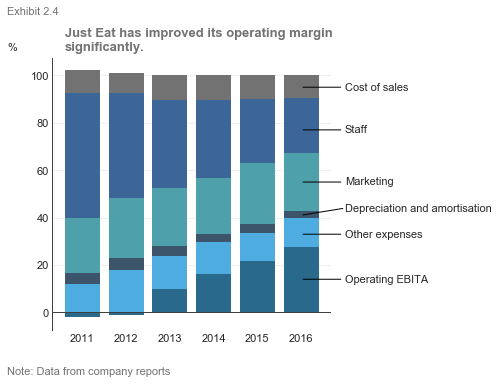

In [4]:
ax=plt.figure(figsize=(5, 5)).add_subplot(111)
ax.bar(range(len(je)), je['Total'], color=cl[-2])
ax.bar(range(len(je)), je['Total']-je['Cost of sales'], color=cl[4])
ax.bar(range(len(je)), je['Total']-je['Cost of sales']-je['Staff'], color=cl[1])
ax.bar(range(len(je)), je['Total']-je['Cost of sales']-je['Staff']-je['Marketing'], color=cl[3])
ax.bar(range(len(je)), je['Total']-je['Cost of sales']-je['Staff']-je['Marketing']-je['Depreciation and amortisation'],
            color=cl[2])
ax.bar(range(len(je)), je['Operating EBITA'], color=cl[0], tick_label=je.index)
ax.annotate('Cost of sales', (5, 95), (6, 95), va='center',
            arrowprops={'arrowstyle': '-', 'connectionstyle': 'arc3', 'linewidth': 1.0})
ax.annotate('Staff', (5, 77), (6, 77), va='center',
            arrowprops={'arrowstyle': '-', 'connectionstyle': 'arc3', 'linewidth': 1.0})
ax.annotate('Marketing', (5, 55), (6, 55), va='center',
            arrowprops={'arrowstyle': '-', 'connectionstyle': 'arc3', 'linewidth': 1.0})
ax.annotate('', (5, 41), (6, 44),
            arrowprops={'arrowstyle': '-', 'connectionstyle': 'arc3', 'linewidth': 1.0})
ax.annotate('Depreciation and amortisation', (5, 41), (6, 44), va='center')
ax.annotate('Other expenses', (5, 33), (6, 33), va='center',
            arrowprops={'arrowstyle': '-', 'connectionstyle': 'arc3', 'linewidth': 1.0})
ax.annotate('Operating EBITA', (5, 14), (6, 14), va='center',
            arrowprops={'arrowstyle': '-', 'connectionstyle': 'arc3', 'linewidth': 1.0})
ax.axhline(0, color='.25', linewidth=1.0)
ax.xaxis.grid(False)
sns.despine(bottom=True)
plt.figtext(0, 0, 'Note: Data from company reports', color='#717271')
plt.figtext(0, .9, '%')
plt.figtext(.16, .94, 'Just Eat has improved its operating margin', size='13', weight='bold', color=cl[7])
plt.figtext(.16, .9, 'significantly.', size='13', weight='bold', color=cl[7])
plt.figtext(0, 1, 'Exhibit 2.4', color='#717271')
plt.savefig('operating_margin.png', dpi=750, bbox_inches='tight')

## Waterfall Graph

In [5]:
df2=pd.read_csv('waterfall_je.csv', index_col=0, header=None).transpose()
df2.rename(columns=lambda x: x.strip(' '), inplace=True)
df2.rename(columns={'Australia and New Zealand': 'Australia and\nNew Zealand',
                    'Established markets': 'Established\nmarkets',
                    'Developing markets': 'Developing\nmarkets',
                    'Head Office inter-segment': 'Head Office\ninter-segment'}, inplace=True)
bot=df2.cumsum(axis=1).shift(1, axis=1)
df2.insert(3, 'UK', 0)
bot.insert(3, 'UK', 0)
df2['UK']=df2['Order-driven']+df2.Other+df2['Inter-segment']
srs=df2.iloc[0]
srs.index.name=''
srs


Order-driven                  224.9
Other                          13.4
Inter-segment                  -1.2
UK                            237.1
Australia and\nNew Zealand     36.8
Established\nmarkets           75.5
Developing\nmarkets            26.2
Head Office                     2.8
Head Office\ninter-segment     -2.7
Total                         375.7
Name: 1, dtype: float64

In [6]:
bot['Order-driven']=0
bot['Total']=0
blank=bot.iloc[0]
blank

0
Order-driven                    0.0
Other                         224.9
Inter-segment                 238.3
UK                              0.0
Australia and\nNew Zealand    237.1
Established\nmarkets          273.9
Developing\nmarkets           349.4
Head Office                   375.6
Head Office\ninter-segment    378.4
Total                           0.0
Name: 1, dtype: float64

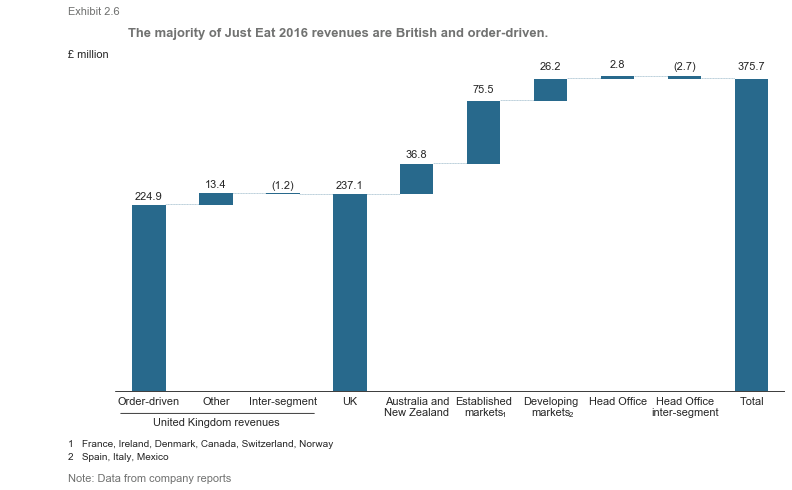

In [7]:
ax2=srs.plot(kind='bar', stacked=True, bottom=blank, legend=None, figsize=(12, 6), grid=False, color=cl[0])
sns.despine(bottom=True, left=True)
for i in range(len(srs)):
    if blank[i]==0:
        y=srs[i]
    else:
        y=blank[i]
    label=srs[i]
    if label<0:
        label='('+str(-label)+')'
    ax2.annotate(label, (i, (srs[i]+blank[i])*1.03), ha='center')
    ax2.annotate('', (i-.78, y), (i-.22, y), arrowprops={'arrowstyle': '-', 'connectionstyle': 'arc3',
                                                         'linewidth': 0.3, 'linestyle': '--', 'color': cl[0]})
ax2.set_ylim(top=srs.Total*1.04)
ax2.annotate('', (-.45, -.065), (2.5, -.065), xycoords=ax2.get_xaxis_transform(),
             arrowprops={'arrowstyle': '-', 'connectionstyle': 'arc3', 'linewidth': 1,'color': '.25'})
ax2.annotate('United Kingdom revenues', (1, -.1), ha='center', xycoords=ax2.get_xaxis_transform())
ax2.annotate(1, (5, 1), (5.26, -29), size=8)
ax2.annotate(2, (6, 1), (6.27, -29), size=8)
ax2.axhline(1, color='.25', linewidth=1)
ax2.set_yticklabels('')
plt.xticks(rotation=0)
plt.figtext(.07, 0, '1   France, Ireland, Denmark, Canada, Switzerland, Norway', size=10)
plt.figtext(.07, -.03, '2   Spain, Italy, Mexico', size=10)
plt.figtext(.07, -.08, 'Note: Data from company reports', color=cl[7])
plt.figtext(.07, .9, '£ million')
plt.figtext(.14, .95, 'The majority of Just Eat 2016 revenues are British and order-driven.', size='13',
            weight='bold', color=cl[7])
plt.figtext(.07, 1, 'Exhibit 2.6', color=cl[7])
plt.savefig('revenues.png', dpi=750, bbox_inches='tight')

## Line Graphs: Changes in Return on Invested Capital

In [8]:
df3=pd.read_csv('ROIC.csv', index_col=0).transpose()
df3

,ROIC without goodwill,ROIC including goodwill
2012,-6.934197,-4.450440
2013,31.629222,18.697362
2014,49.597903,23.342033
2015,57.694400,11.810898
2016,70.595788,10.967500


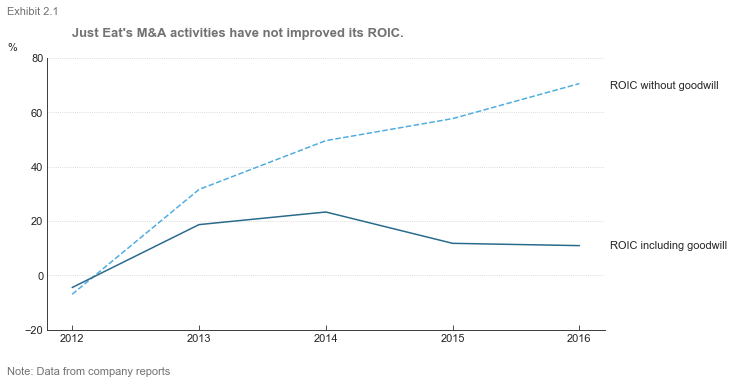

In [9]:
ax3=plt.figure(figsize=(10, 5)).add_subplot(111)
ax3.plot(df3['ROIC without goodwill'], color=cl[2], linestyle='--')
ax3.plot(df3['ROIC including goodwill'], color=cl[0])
ax3.annotate('ROIC without goodwill', (1.01, df3.iloc[-1, 0]-2), xycoords=ax3.get_yaxis_transform())
ax3.annotate('ROIC including goodwill', (1.01, df3.iloc[-1, 1]), xycoords=ax3.get_yaxis_transform(), va='center')
ax3.xaxis.grid(False)
ax3.set_ylim(-20, 80)
ax3.xaxis.set_major_locator(MaxNLocator(5))
ax3.tick_params(axis='x', size=5, direction='in')
sns.despine()
plt.figtext(.07, 0, 'Note: Data from company reports', color=cl[7])
plt.figtext(.07, .9, '%')
plt.figtext(.16, .94, 'Just Eat\'s M&A activities have not improved its ROIC.', size='13', weight='bold', color=cl[7])
plt.figtext(.07, 1, 'Exhibit 2.1', color=cl[7])
plt.savefig('roic.png', dpi=750, bbox_inches='tight')

In [10]:
df4=pd.read_csv('Grubhub_ROIC.csv', index_col=0).transpose()
df4

,Grubhub,Just Eat
2013,-1.044681,18.697362
2014,0.286700,23.342033
2015,5.309150,11.810898
2016,4.613324,10.967500


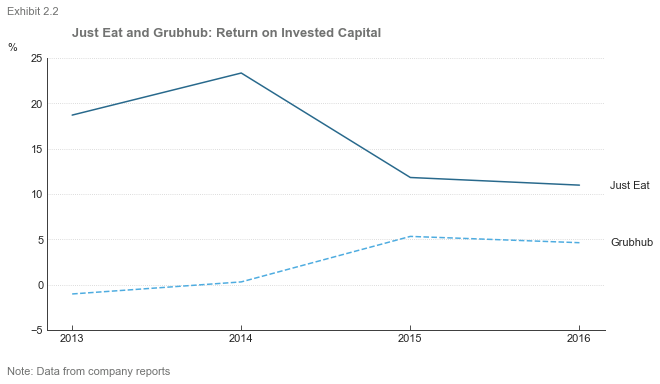

In [11]:
ax4=plt.figure(figsize=(10, 5)).add_subplot(111)
ax4.plot(df4['Grubhub'], color=cl[2], linestyle='--')
ax4.plot(df4['Just Eat'], color=cl[0])
ax4.annotate('Grubhub', (1.01, df4.iloc[-1, 0]), va='center', xycoords=ax4.get_yaxis_transform())
ax4.annotate('Just Eat', (1.01, df4.iloc[-1, 1]), va='center', xycoords=ax4.get_yaxis_transform())
ax4.xaxis.grid(False)
ax4.set_ylim(-5, 25)
ax4.xaxis.set_major_locator(MaxNLocator(4))
ax4.tick_params(axis='x', size=5, direction='in')
sns.despine()
plt.figtext(.07, 0, 'Note: Data from company reports', color=cl[7])
plt.figtext(.07, .9, '%')
plt.figtext(.16, .94, 'Just Eat and Grubhub: Return on Invested Capital', size='13', weight='bold', color=cl[7])
plt.figtext(.07, 1, 'Exhibit 2.2', color=cl[7])
plt.savefig('grubhub_roic.png', dpi=750, bbox_inches='tight')

## Bar Graph: Growth Forecast of the Delivery Market

In [12]:
df5=pd.read_csv('delivery_category.csv', index_col=0).transpose()
df5=df5.apply(lambda x: pd.to_numeric(x.str.replace(',', '')), axis=1)
df5

,Offline,Online,Total
2015,15011.5,4335.3,19346.8
2016,15873.4,5690.1,21563.5
2017,15558.0,6435.6,21993.6
2018,15151.5,7231.2,22382.7
2019,14767.4,7971.6,22739.0
2020,14469.0,8583.7,23052.7
2021,13967.1,9355.4,23322.5


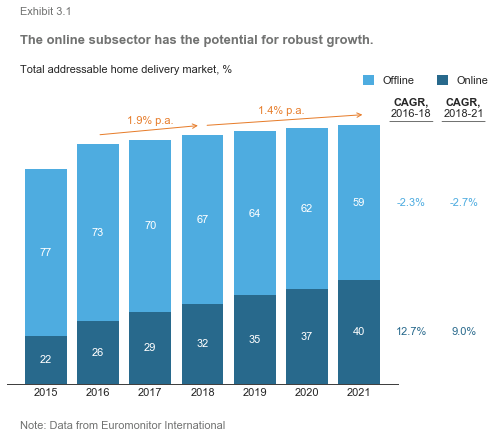

In [13]:
ax5=plt.figure(figsize=(7, 5)).add_subplot(111)
ax5.bar(range(len(df5)), df5.Total, color=cl[2])
ax5.bar(range(len(df5)), df5.Online, color=cl[0], tick_label=df5.index)
ax5.xaxis.grid(False)
ax5.yaxis.grid(False)
ax5.set_yticklabels([])
for i in range(len(df5)):
    ax5.annotate(int(df5.Online[i]/df5.Total[i]*100), (i, df5.Online[i]/2), color='white', ha='center', va='center')
    ax5.annotate(int(df5.Offline[i]/df5.Total[i]*100), (i, df5.Online[i]+df5.Offline[i]/2), color='white',
                 ha='center', va='center')
ax5.annotate('', (2.95, df5.Total[3]*1.04), (1, df5.Total[1]*1.04),
             arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3', 'linewidth': 1.0, 'color': cl[5]})
ax5.annotate('', (6.1, df5.Total[6]*1.04), (3.05, df5.Total[3]*1.04),
             arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3', 'linewidth': 1.0, 'color': cl[5]})
ax5.annotate('1.9% p.a.', (2, df5.Total[2]*1.065), ha='center', color=cl[5])
ax5.annotate('1.4% p.a.', (4.5, (df5.Total[4]+df5.Total[5])*1.065/2), ha='center', color=cl[5])
ax5.annotate('-2.3%', (0, 0), (7, df5.Online[6]+df5.Offline[6]/2),
             ha='center', va='center', color=cl[2])
ax5.annotate('-2.7%', (0, 0), (8, df5.Online[6]+df5.Offline[6]/2),
             ha='center', va='center', color=cl[2])
ax5.annotate('12.7%', (0, 0), (7, df5.Online[6]/2), ha='center', va='center', color=cl[0])
ax5.annotate('9.0%', (0, 0), (8, df5.Online[6]/2), ha='center', va='center', color=cl[0])
ax5.annotate('CAGR,', (0, 0), (7, df5.Total[6]*1.09), ha='center', va='center', weight='bold')
ax5.annotate('CAGR,', (0, 0), (8, df5.Total[6]*1.09), ha='center', va='center', weight='bold')
ax5.annotate('2016-18', (0, 0), (7, df5.Total[6]*1.042), ha='center', va='center')
ax5.annotate('2018-21', (0, 0), (8, df5.Total[6]*1.042), ha='center', va='center')
ax5.annotate('', (6.55, .965), (7.45, .965), xycoords=ax5.get_xaxis_transform(),
             arrowprops={'arrowstyle': '-', 'connectionstyle': 'arc3', 'linewidth': 1,'color': cl[7]})
ax5.annotate('', (7.55, .965), (8.45, .965), xycoords=ax5.get_xaxis_transform(),
             arrowprops={'arrowstyle': '-', 'connectionstyle': 'arc3', 'linewidth': 1,'color': cl[7]})
ax5.legend(['Offline', 'Online'], loc=(.9, 1.08), ncol=2, handlelength=1, handleheight=1)
sns.despine(left=True)
plt.figtext(.15, 0, 'Note: Data from Euromonitor International', color=cl[7])
plt.figtext(.15, .99, 'Total addressable home delivery market, %')
plt.figtext(.15, 1.07, 'The online subsector has the potential for robust growth.', size='13', weight='bold',
            color=cl[7])
plt.figtext(.15, 1.15, 'Exhibit 3.1', color=cl[7])
plt.rc('font', size='12')
plt.savefig('delivery_market.png', dpi=750, bbox_inches='tight')